In [1]:
import cv2
import numpy as np
from edge import sobel_edge
import tools
import matplotlib.cm as cm   
import math
from copy import deepcopy

In [2]:
img = cv2.imread('img/building.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [3]:
"""
ka7 = np.ones((5, 5), dtype=float) / 25
img_lp = cv2.filter2D(gray, -1, ka7, borderType=cv2.BORDER_CONSTANT)
edges_sobel = cv2.Canny(img_lp, 50, 255, None, 3)
"""

img_lp = gray
edges_sobel = sobel_edge(img_lp, threshold=15)

In [4]:
lines = cv2.HoughLinesP(edges_sobel, 1, np.pi/180, threshold=50, minLineLength=30, maxLineGap=10)

img_proba = deepcopy(img)

for line in lines:
    print(line)
    x1, y1, x2, y2 = line[0]
    #print((x1, y1))
    #print((x2, y2))
    cv2.line(img_proba, (x1, y1), (x2, y2), (255, 0, 0), 1) 


[[   1    2 1278    2]]
[[   0    1 1279    1]]
[[  2 346   2   3]]
[[  1 410   1   0]]
[[ 44 455 591 299]]
[[455 339 458 183]]
[[344 354 349 222]]
[[454 554 456 414]]
[[576 544 576 125]]
[[400 560 403 428]]
[[ 56 331 530 159]]
[[ 45 456 598 298]]
[[ 44 454 526 316]]
[[ 57 329 473 178]]
[[291 247 590 139]]
[[ 73 508 120 497]]
[[ 28 823  54 452]]
[[577 570 577 123]]
[[247 382 253 257]]
[[526 306 526 161]]
[[ 56 812  64 691]]
[[331 665 403 657]]
[[491 790 491 710]]
[[219 210 599  64]]
[[579 797 579 488]]
[[372 564 374 435]]
[[525 791 525 642]]
[[752 664 756 793]]
[[226 809 233 674]]
[[974 495 991 822]]
[[335 576 339 443]]
[[448 804 451 651]]
[[164 802 171 681]]
[[487 753 487 713]]
[[578 683 578 385]]
[[207 391 212 300]]
[[490 456 490 406]]
[[149 604 155 486]]
[[526 320 528 204]]
[[ 80 430  83 391]]
[[523 321 523 238]]
[[206 392 208 343]]
[[1029  450 1034  518]]
[[176 596 179 532]]
[[575 483 575 127]]
[[245 800 247 732]]
[[134 802 187 800]]
[[492 544 492 406]]
[[153 880 155 846]]
[[755 47

[[300 842 306 804]]
[[742 773 746 743]]
[[248 320 252 259]]
[[1113  513 1118  570]]
[[  7 678  39 674]]
[[731 442 773 461]]
[[366  93 423  69]]
[[ 45 453 404 350]]
[[  2 486   2 528]]
[[740 794 771 795]]
[[741 793 774 793]]
[[451 702 452 758]]
[[737 714 776 677]]
[[138 738 188 768]]
[[725 278 755 297]]
[[291 163 294 123]]
[[1115  513 1153  541]]
[[454 276 455 313]]
[[300 898 305 832]]
[[472 661 474 701]]
[[908 563 916 527]]
[[182 881 182 848]]
[[225 790 231 691]]
[[851 388 853 426]]
[[468  51 539  21]]
[[ 85 577  89 502]]
[[156 698 191 700]]
[[305 109 352 136]]
[[457 284 458 336]]
[[190 843 239 847]]
[[1149  552 1151  593]]
[[246 380 299 365]]
[[449 729 524 724]]
[[724 236 762 263]]
[[471 675 524 673]]
[[139 723 188 718]]
[[732 570 766 536]]
[[160 598 195 593]]
[[248 306 250 348]]
[[358 485 361 441]]
[[740 709 770 713]]
[[489 732 490 783]]
[[409 291 411 235]]
[[511 504 511 541]]
[[155 779 157 746]]
[[787 281 822 305]]
[[1018  340 1027  380]]
[[327 153 359 121]]
[[361 233 415 214]]
[[45

In [5]:
"""
https://docs.opencv.org/3.4/d9/db0/tutorial_hough_lines.html
"""
lines = cv2.HoughLines(edges_sobel, 1, np.pi/ (180), 300, None, 0, 0)

img_hough = cv2.imread('img/building.png', cv2.IMREAD_COLOR)

for line in lines:
    for rho, theta in line:
        #print(rho)
        #print(theta)
        a = math.cos(theta)
        b = math.sin(theta)
        x0 = a * rho
        y0 = b * rho
        #print(x0)
        #print(y0)
        pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
        pt2 = (int(x0 - 1000*(-b)) , int(y0 - 1000*(a)))
        #print(pt1)
        #print(pt2)
        cv2.line(img_hough, pt1, pt2, (255, 0, 0), 1)
        

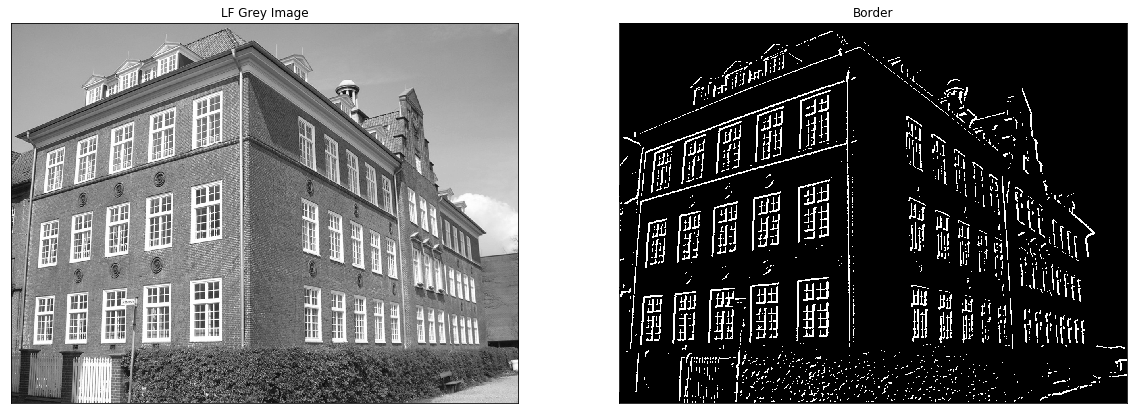

In [6]:
tools.multiPlot(1, 2, 
                (img_lp, edges_sobel),
                ('LF Grey Image', 'Border'),
                cmap_tuple=(cm.gray, cm.gray))

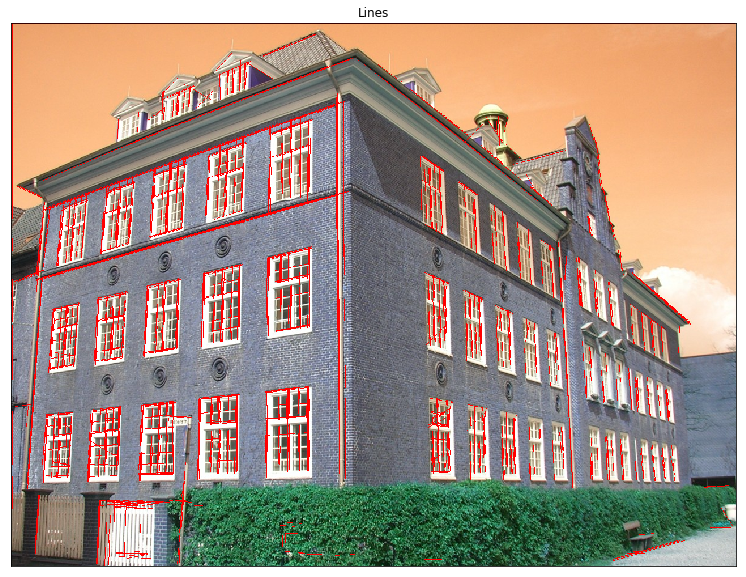

In [7]:
tools.multiPlot(1, 1, 
                (img_proba,),
                ('Lines',),
                cmap_tuple=(cm.gray,))

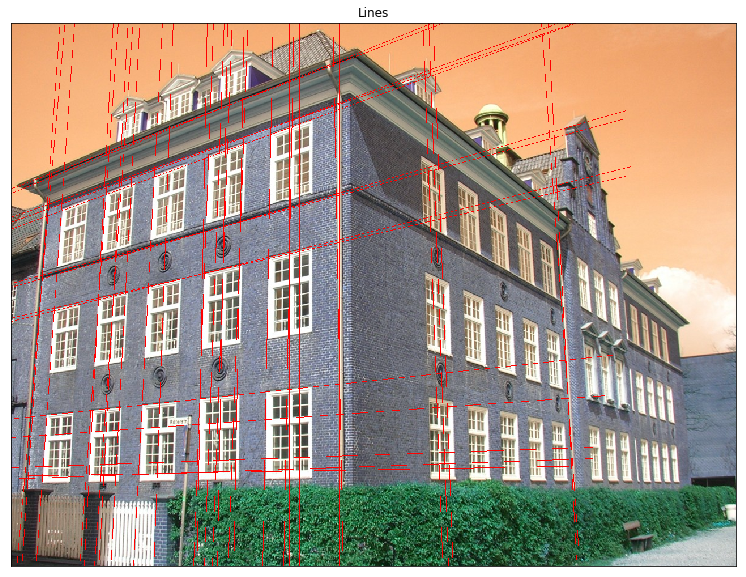

In [8]:
tools.multiPlot(1, 1, 
                (img_hough,),
                ('Lines',),
                cmap_tuple=(cm.gray,))

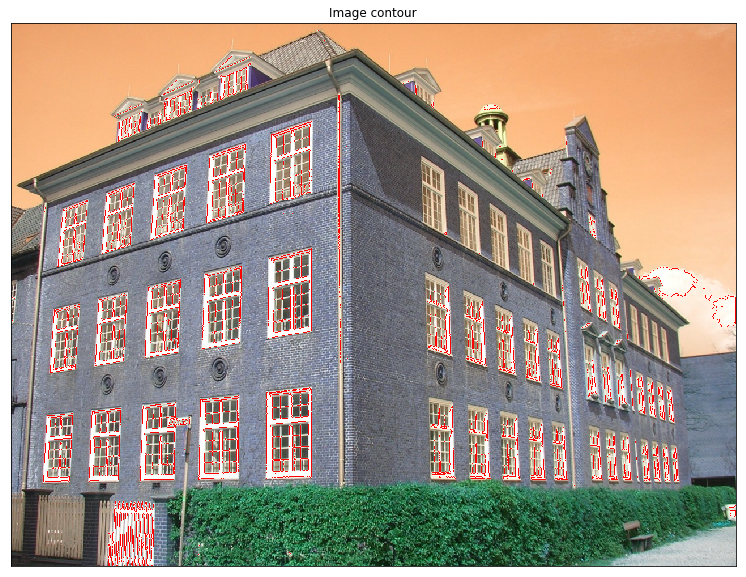

In [9]:
img_cont = deepcopy(img)
# ret, thresh = cv2.threshold(img_lp, 0, 255, 0)
# ret, thresh = cv2.threshold(edges_sobel, 0, 255, 0)
# thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 7, 20)
ret, thresh = cv2.threshold(gray, 240, 255, 0)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
cv2.drawContours(img_cont, contours, -1, (255, 0, 0), 1)
tools.multiPlot(1, 1, 
                (img_cont,),
                ('Image contour',),
                cmap_tuple=(cm.gray,))

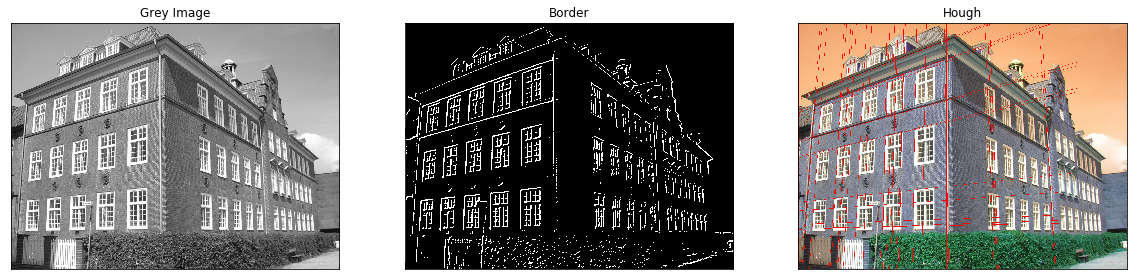

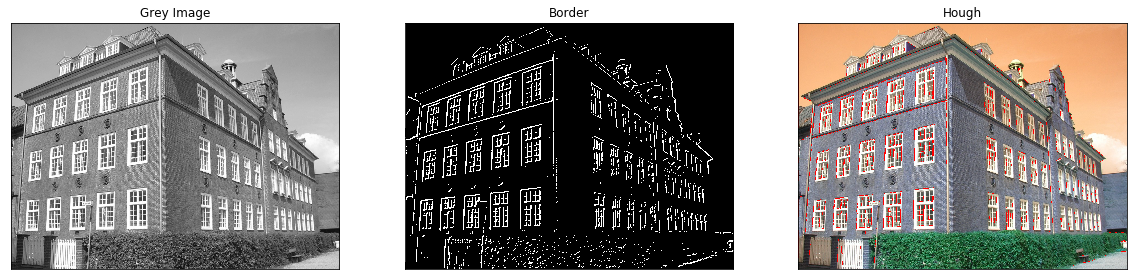

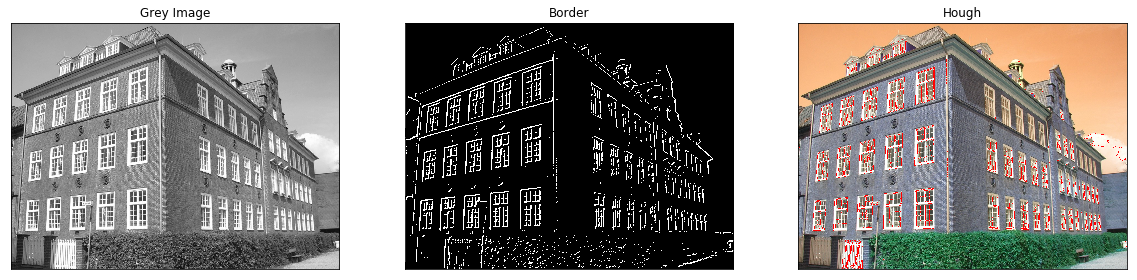

In [10]:
from line import hough_determinist, hough_probabilist, contours

img = cv2.imread('img/building.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges_sobel = sobel_edge(gray, threshold=15)
hough_determinist(edges_sobel, img)

tools.multiPlot(1, 3,
                (gray, edges_sobel, img),
                ('Grey Image', 'Border', 'Hough'),
                cmap_tuple=(cm.gray, cm.gray, cm.gray))


img = cv2.imread('img/building.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges_sobel = sobel_edge(gray, threshold=15)
hough_probabilist(edges_sobel, img)

tools.multiPlot(1, 3,
                (gray, edges_sobel, img),
                ('Grey Image', 'Border', 'Hough'),
                cmap_tuple=(cm.gray, cm.gray, cm.gray))



img = cv2.imread('img/building.png', cv2.IMREAD_COLOR)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges_sobel = sobel_edge(gray, threshold=15)
contours(gray, img)

tools.multiPlot(1, 3,
                (gray, edges_sobel, img),
                ('Grey Image', 'Border', 'Hough'),
                cmap_tuple=(cm.gray, cm.gray, cm.gray))